<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/DLScratch1Study/DLscratch_ch4_prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#210211 밑바닥부터 시작하는 딥러닝 4장 정리
이번주에 있을 4장 스터디 내용을 정리한다.

참고도서 : 밑바닥부터 시작하는 딥러닝 4장

## 4.2 손실함수(loss function)

- 신경망의 현 상태를 나타내는 지표를 loss functuon으로 표현하게 될 것이다.
  - '**손실**'함수라는 이름에서 보듯 신경망이 얼마나 나쁜지에 대해 논의하는 지표이다.

- 대표적인 손실 함수는 오차제곱합과 엔트로피.
(물론 새로 정의하는 경우도 많을 것이지만)

### 오차제곱합 (Sum of squares for error, SSE)
(어째선지는 모르겠지만, 책에서는 굳이 0.5를 곱한다)

$$ E = \frac{1}{2}\sum_{k}(y_{k}-t_{k})^{2}$$


실제 사용에서는 오차제곱합이 가장 적은 것을 정답으로 추정해볼 수 있을 것이다.

In [ ]:
# SSE의 구현
import numpy as np
def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [ ]:
# 비교 예시
t = [0, 0, 1, 0, 0]  # 참값. 정답은 2라고 생각
y1 = [0.1, 0.1, 0.6, 0.15, 0.05]  # 2일 확률을 최대로 예상한 예시
y2 = [0.6, 0.1, 0.1, 0.15, 0.05]  # 0일 확률을 최대로 예상한 예시

print(sum_squares_error(np.array(y1), np.array(t)))
print(sum_squares_error(np.array(y2), np.array(t)))

0.10250000000000002
0.6025


### 교차 엔트로피 오차 (Cross Entropy Error, CEE)
$$ E = -\sum_{k}t_{k}log \;y_{k}$$
여기서 실제 참값인 $t_{k}$는 One-hot Encoding이 적용된다.
로그를 사용하기에 로그에 들어가야 하는 값은 양수이므로, 실제 구현에서는 매우 작은 값을 더하게 된다.

확률을 기준으로 출력하기에 1보다 작은 값이고, 더 작은 값이 맞다고 예측할 경우 로그의 성질에 의해, 엔트로피 값이 커질 것이다.

엔트로피(불순도)가 낮을수록 더 좋은 예측이다.


In [ ]:
# CEE의 구현
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y+delta))

In [ ]:
# CEE의 예시, 위와 동일한 수치 이용
print(cross_entropy_error(np.array(y1), np.array(t)))
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


### 미니배치

훈련 데이터가 1개라는 보장은 없다.. 훈련 데이터가 수십만, 수백만 개인 경우를 생각하면 전체를 대상으로 손실함수를 계산하는 것은 무리일 것이다.
훈련 데이터 중에서 일부만을 골라 학습을 수행하는 것을** mini-batch** 라고 한다.

In [ ]:
# Mini-Batch의 예시
train_size = x_train.shape[0]
bath_size = 10
batch_mark = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mark]
t_batch = t_train[batch_mark]

NameError: ignored

이제 배치된 데이터 셋의 교차 엔트로피 오차를 구할 수 있을 것이다.
이 경우, 각 데이터 별로의 교차 엔트로피의 평균을 구하게 된다.
$$ E = -\frac{1}{N}\sum_{n}\sum_{k}t_{nk}\;log\;y_{nk}$$

## 4.3 수치 미분
당연히, 일반적인 함수 미분은 유감스럽게도 구현이 곤란하다.
실제 사용에서는 오차함수의 최적화를 위해서는 미분을 활용해야 한다.

### 미분과 수치 미분의 정의
일반적인 미분의 정의는 알다시피,
$$ \frac{df(x)}{dx} = \lim_{h\rightarrow0}\frac{f(x+h)-f(x)}{h}$$

하지만, 컴퓨터상에서는
- 이 limit를 실제로 구현하는 것이 불가능!
- 하다못해 정말 작은 h, 막 예를 들어 1e-50을 쓰고 싶어도.. 반올림문제로 오차를 만든다.  h=1e-04 정도로 사용한다.

즉, 이 경우 미분이 아닌 실제로는 **차분** 개념을 사용하게 된다.

그럼, 위의 식대로 사용하면 정녕 괜찮은건가?
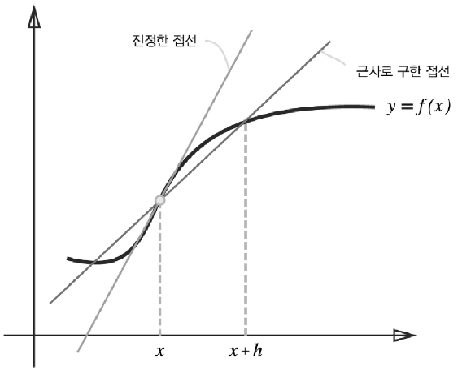

그림을 보면 알겠지만, 근사로 구한 접선의 경우는 $x$와 $x+h$ 좌표 사이의 기울기를 뜻하지만.. 접선과는 차이가 크다.

애초에 수치미분에는 오차가 포함되지만, 이 오차를 줄이기 위해서는 우측 방향에서만 값을 줄이는 것이 아닌, 양측에서 h값을 줄이는 방식 또한 사용이 가능할 것이다.


In [ ]:
# 실제 수치 미분의 구현
def numerical_diff(f, x):
  h = 1e-04
  return (f(x+h)-f(x-h))/(2*h)

In [ ]:
# 수치 미분의 예시
def ftn (x):
  return x ** 2 - x

numerical_diff(ftn, 5)  # 실제 정답은 9

8.999999999979025

### 편미분의 구현
다변수 함수의 미분의 경우는 어떤 변수에 대해 미분할 것인가가 중요할 것이다.
특정 지점에서의 편미분 값을 구하기 위해서는 미분하려는 하나의 변수를 제외하고 나머지를 고정시키면 쉽게 해결된다.

문제) $f(x, y) = x^{2}+y^{2}$ 에 대해, $ x = 3, y = 4 $ 지점에서 각 변수의 수치 편미분은?  

In [ ]:
def ftn_1 (x0):
  return x0 ** 2 + 4 ** 2

numerical_diff(ftn_1, 3)  # 실제 정답은 6

6.00000000000378

In [ ]:
def ftn_2 (y0):
  return 3 ** 2 + y0 ** 2

numerical_diff(ftn_2, 4)  # 실제 정답은 8

7.999999999999119

## 4.4 기울기와 경사하강법


### Gradient
모든 변수의 편미분의 벡터 표현을 Gradient라고 하며, 이는 다변수 함수에서 기울기 역할을 하게 된다.

In [ ]:
def numerical_gradient(f, x):
  h = 1e-04
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]
    x[idx] = tmp_val + h
    fxh1 = f(x)

    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1-fxh2) / (2*h)
    x[idx] = tmp_val
  
  return grad

### 경사하강법
경사하강법은 rough하게는 기울기를 사용하여 함수의 최솟값을 찾는 방법이다.
( 기울기가 가리키는 곳에 함수의 최솟값이라는 보장은 없다. 정확히는 극값이거나 안장점일 것이다)

기울어진 방향은 함수의 값을 줄일 수 있는 방향을 준다.
최솟값을 찾는 경우는 Gradient Descent Method,
최댓값을 찾는 경우는 Gradient Ascent Method.
라고 부른다.

경사하강법은, 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다.
기울어진 방향으로 조금씩 나아가며 함수의 값을 점차 줄이거나 늘린다.

수식으로 표현할 경우 다음가 같다.

$$ x_{0} = x_{0} - \eta\frac{\partial f}{\partial x_{0}}$$
$$ x_{1} = x_{1} - \eta\frac{\partial f}{\partial x_{1}}$$

위를 여러 번 반복하게 된다. 여기서 $\eta$는 학습률이 된다.
(이 학습률이 너무 크면 발산하기 쉽고, 너무 작으면 함수값이 제대로 갱신될 수 없다.)

In [ ]:
def gradient_descent(f, init_x, lr, step_num):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr*grad
  return x

In [ ]:
# example
def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, -4.0]) # 시작점
print(gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num=5))
print(gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num=100 ))
print(gradient_descent(function_2, init_x = init_x, lr = 300, step_num=100 ))
# 정답 : (0, 0)

[-0.98304 -1.31072]
[-2.00248785e-10 -2.66998379e-10]
[-3.31221939e+12 -4.44086855e+12]


### 신경망에서의 기울기

신경망에서의 기울기는 가중치 매개변수에 대한 손실 함수의 기울기를 의미한다.
손실함수를 각 가중치에 대해 미분하고 이를 행렬로 표현하게 된다.

In [ ]:
# 소프트맥스의 구현(from ch3)

def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c) # 오버플로 막기
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [ ]:
# class 구현
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)
  
  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

In [ ]:
# example_samplenet
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
t = np.array([0, 0, 1])
net.loss(x, t)

[[-0.93343646 -0.38807755 -0.91693233]
 [ 0.64469299  0.06308762 -0.3179356 ]]
[ 0.02016181 -0.17606768 -0.83630144]


1.6658294774158389

In [ ]:
# example_gradient

def f(w):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)  # 왜 오류가 발생?  # f는 뭐고.
print(dW)

## 4.5 학습 알고리즘의 구현

### 신경망 학습의 절차
신경망에 적응 가능한 가중치와 편향이 있고, 이를 훈련 데이터에 적응하도록 조정하는 과정인 '학습'을 할 수 있어야 한다.

- 1단계 : Mini Batch
  - 훈련데이터 중 일부를 무작위로 가져옴. 목표는 Mini Batch의 손실함수값 줄이기
- 2단계 : gradient 산출
  - 가중치 매개변수의 기울기를 구한다.
  - 기울기는 손실함수 값을 가장 작게 하는 방향을 제시한다.
- 3단계 : 매개변수의 갱신
  - Gradient descent를 활용하여 가중치 매개변수를 갱신
- 4단계 : 위의 과정을 반복한다.

Mini Batch 과정에서 데이터를 무작위로 선정하기에, 일반적인 경사 하강법이 아닌, **stochastic gradient descent (확률적 경사 하강법)** 이라고 한다.

실제 코드를 통해 자세한 구현을 알아보자.

In [161]:
# 2층 신경망 클래스의 구현

class TwoLayerNet:
  def __init__ (self, input_size, hidden_size, output_size, 
                weight_init_std=0.01):
    # 가중치의 초기화
    # params : 신경망의 매개변수를 보관함 (가중치, 편향)
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):  
    # 기본적인 이층 신경망대로.
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)
  
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis = 1)
    t = np.argmax(t, axis = 1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}  # 기울기를 보관함
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

  def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

### 시험 데이터를 통한 평가

특정 시점부터 손실함수의 값이 서서히 내려감을 알 수 있다.
신경망의 학습에서는 훈련데이터 외의 데이터를 올바르게 인식하는지를 알아야 한다.
다른말로 'Overfitting'이 일어나지 않는지 확인해야 한다.

Remark. 에폭(epoch) 
에폭은 하나의 단위로 1에폭이란 훈련데이터를 모두 소진했을때의 횟수에 해당.

In [143]:
# 이놈의 import문제는 대체 어떻게 해결해야 하는건가요?
# 구글에서 찾아본 그 어떤 방법도 제 컴퓨터에서는 안먹히네요.
# 짜증나서 그냥 mnist를 박아버린다.

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

# from tensorflow.keras.datasets.mnist import load_data

In [147]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath('__file__'))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기
    
    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label : 
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()


Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [153]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=True)

In [155]:
# 시그모이드 함수의 구현

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.array([-1.5, 2.5, 0])
sigmoid(x)

array([0.18242552, 0.92414182, 0.5       ])

In [ ]:
import numpy as np

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

#hyperparameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 에폭당 반복수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  # mini batch 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.gradient(x_batch, t_batch)

  # 매개변수의 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
  
  # 학습경과의 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  # 1에폭당의 정확도 계산
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc |" + str(train_acc) + "," + str(test_acc))
